In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnist import MNIST
%matplotlib inline

In [2]:
mndata=MNIST("C:/Users/dim/Desktop/IDA2")

In [3]:
train_images,train_labels=mndata.load_training()
test_images,test_labels=mndata.load_testing()

Число 5
Отображение числа:


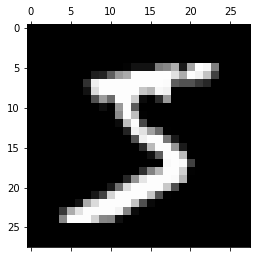

Число 0
Отображение числа:


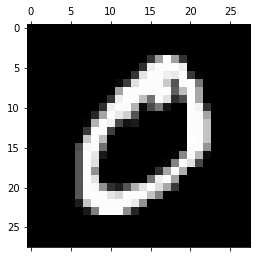

Число 4
Отображение числа:


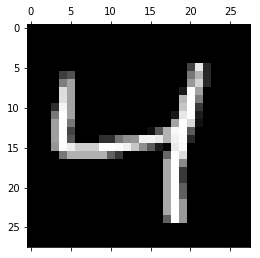

Число 1
Отображение числа:


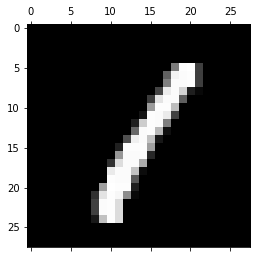

Число 9
Отображение числа:


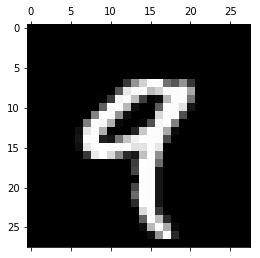

Число 2
Отображение числа:


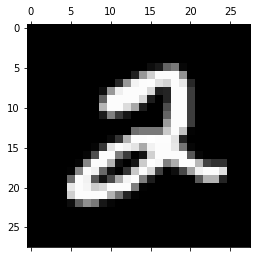

In [4]:
for i in range(6):
    print("Число %i"%train_labels[i])
    print("Отображение числа:")
    plt.gray()
    plt.matshow(np.reshape(train_images[i],(28,28)))
    plt.show()

Число 7
Отображение числа:


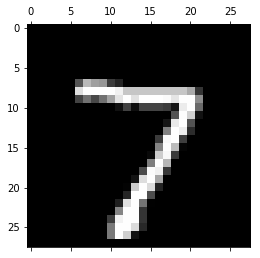

Число 2
Отображение числа:


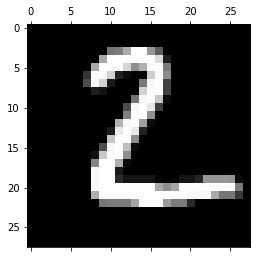

Число 1
Отображение числа:


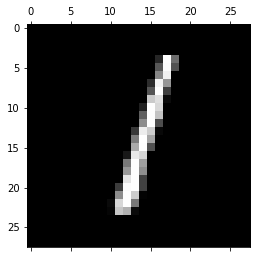

Число 0
Отображение числа:


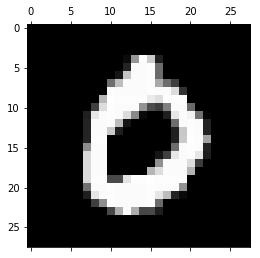

Число 4
Отображение числа:


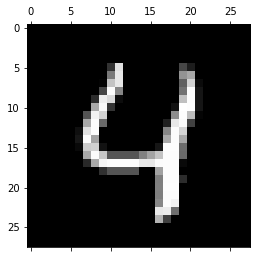

Число 1
Отображение числа:


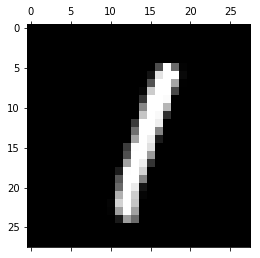

In [5]:
for i in range(6):
    print("Число %i"%test_labels[i])
    print("Отображение числа:")
    plt.gray()
    plt.matshow(np.reshape(test_images[i],(28,28)))
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix

In [24]:
rfc=RandomForestClassifier(n_estimators=100)
lr=LogisticRegression(penalty="l1",tol=0.0075)
bnb=BernoulliNB()
gnb=GaussianNB()
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
train_X=np.array(train_images)
test_X=np.array(test_images)

In [27]:
%%time
KFold=5
itog_val={}
scores=cross_val_score(rfc,train_X,train_labels,cv=KFold)
itog_val["RandomForestClassifier"]=scores.mean()
scores=cross_val_score(lr,train_X,train_labels,cv=KFold)
itog_val["LogisticRegression"]=scores.mean()
scores=cross_val_score(gnb,train_X,train_labels,cv=KFold)
itog_val["GaussianNB"]=scores.mean()
scores=cross_val_score(bnb,train_X,train_labels,cv=KFold)
itog_val["BernoulliNB"]=scores.mean()

Wall time: 13min 19s


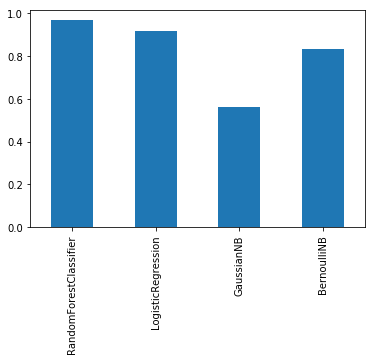

In [28]:
pd.DataFrame.from_dict(data=itog_val,orient="index").plot(kind="bar",legend=False)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(train_X,train_labels,test_size=0.25)

In [35]:
predicted=rfc.fit(X_train,y_train).predict(X_test)
confusion_matrix(y_test,predicted)

array([[1477,    0,    0,    0,    2,    0,    6,    0,    5,    1],
       [   0, 1684,   14,    6,    2,    0,    3,    5,    2,    0],
       [   5,    3, 1413,   10,    5,    0,    7,   10,    6,    1],
       [   5,    2,   23, 1384,    3,   19,    2,   12,   10,    8],
       [   1,    3,    2,    0, 1382,    0,    8,    2,    3,   25],
       [   2,    5,    1,   18,    5, 1355,    9,    2,   11,    5],
       [   1,    4,    0,    0,    2,   12, 1469,    0,    6,    0],
       [   2,    7,    9,    0,    6,    0,    0, 1534,    3,   16],
       [   5,   14,   12,   12,    4,   11,    6,    0, 1396,   16],
       [   4,    3,    2,   15,   14,    1,    1,    8,    8, 1423]], dtype=int64)

In [36]:
predicted=lr.fit(X_train,y_train).predict(X_test)
confusion_matrix(y_test,predicted)

array([[1455,    0,    3,    1,    3,    8,    9,    3,    7,    2],
       [   1, 1667,   18,    6,    3,    4,    2,    4,   10,    1],
       [  11,   21, 1281,   34,   12,   10,   23,   16,   48,    4],
       [  10,    5,   34, 1304,    2,   47,    8,   11,   28,   19],
       [   0,    9,    9,    4, 1313,    3,    8,    9,   16,   55],
       [  11,    8,    9,   62,   18, 1199,   27,    5,   51,   23],
       [   7,    3,   12,    1,    8,   21, 1430,    0,   12,    0],
       [   7,    5,   13,    3,   18,    6,    1, 1462,    7,   55],
       [  15,   36,   18,   50,    7,   45,    6,    4, 1266,   29],
       [   7,    8,    6,   26,   38,   11,    1,   57,    7, 1318]], dtype=int64)

In [37]:
predicted=gnb.fit(X_train,y_train).predict(X_test)
confusion_matrix(y_test,predicted)

array([[1341,    2,    9,    7,    2,    2,   63,    1,   37,   27],
       [   1, 1621,    8,   10,    1,    4,   30,    1,   26,   14],
       [ 164,   42,  432,  108,   11,   15,  378,    3,  286,   21],
       [ 110,   87,   20,  541,    6,    6,   95,   14,  443,  146],
       [  31,   17,   11,   10,  303,   14,  158,   10,  238,  634],
       [ 193,   49,   10,   32,   14,  115,   93,    7,  756,  144],
       [   9,   35,   14,    0,    0,    8, 1400,    0,   25,    3],
       [   6,   11,    1,    8,   17,    2,    7,  567,   47,  911],
       [  30,  242,    6,   11,    6,   17,   34,    4,  879,  247],
       [   7,   15,    4,    1,   16,    1,    0,   29,   24, 1382]], dtype=int64)

In [40]:
predicted=bnb.fit(X_train,y_train).predict(X_test)
confusion_matrix(y_test,predicted)

array([[1334,    1,    7,   11,    3,   67,   24,    0,   42,    2],
       [   0, 1641,   24,    5,    2,   17,   10,    0,   14,    3],
       [  24,   17, 1217,   34,   32,    6,   59,   14,   54,    3],
       [  17,   40,   75, 1164,    7,   41,   11,   16,   61,   36],
       [   0,   11,    9,    0, 1129,   11,   22,    7,   37,  200],
       [  45,   27,   18,  207,   45,  948,   34,    6,   40,   43],
       [  11,   37,   26,    0,    9,   46, 1356,    0,    9,    0],
       [  10,   33,    9,    5,   36,    5,    1, 1338,   33,  107],
       [  25,   55,   28,  128,   18,   39,    6,    2, 1111,   64],
       [  13,   20,    8,   18,  110,    2,    0,   63,   39, 1206]], dtype=int64)

In [41]:
result=rfc.fit(train_X,train_labels).predict(test_X)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,result)

0.96950000000000003

Предсказанное число 7
Соответствующее изображение числа:


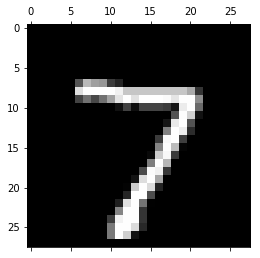

Предсказанное число 2
Соответствующее изображение числа:


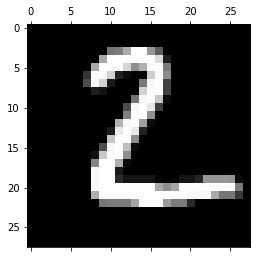

Предсказанное число 1
Соответствующее изображение числа:


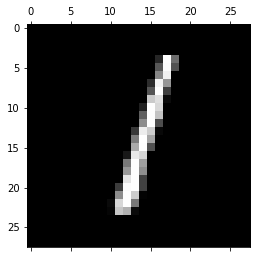

Предсказанное число 0
Соответствующее изображение числа:


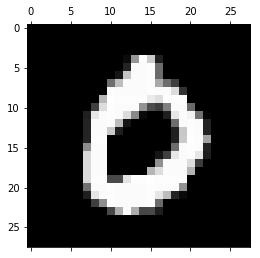

Предсказанное число 4
Соответствующее изображение числа:


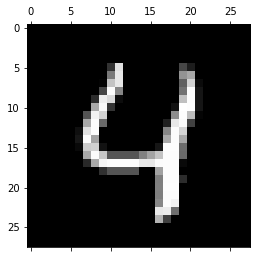

Предсказанное число 1
Соответствующее изображение числа:


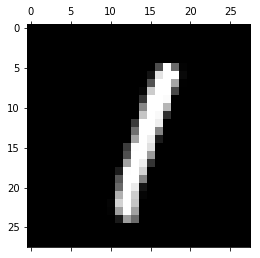

Предсказанное число 4
Соответствующее изображение числа:


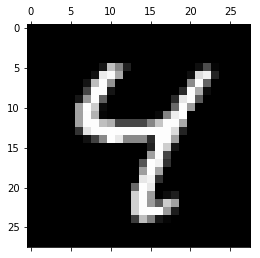

Предсказанное число 9
Соответствующее изображение числа:


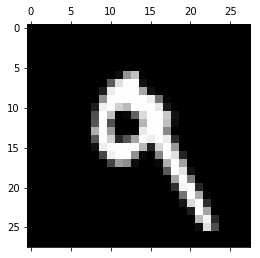

Предсказанное число 5
Соответствующее изображение числа:


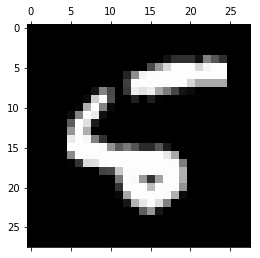

Предсказанное число 9
Соответствующее изображение числа:


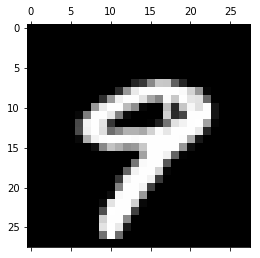

Предсказанное число 0
Соответствующее изображение числа:


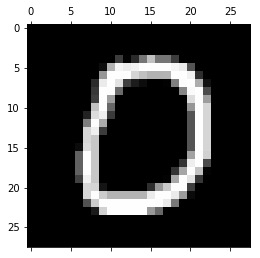

Предсказанное число 6
Соответствующее изображение числа:


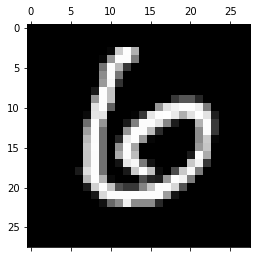

Предсказанное число 9
Соответствующее изображение числа:


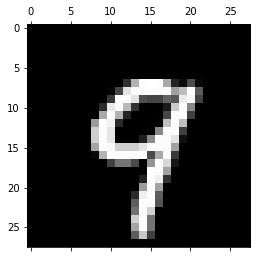

Предсказанное число 0
Соответствующее изображение числа:


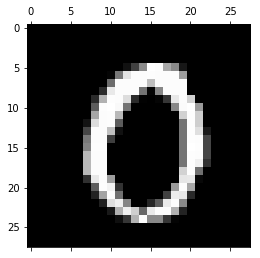

Предсказанное число 1
Соответствующее изображение числа:


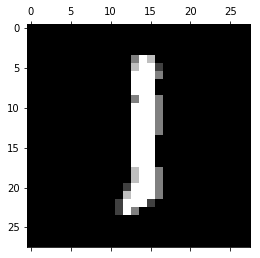

Предсказанное число 5
Соответствующее изображение числа:


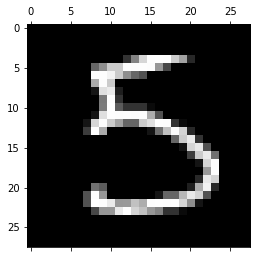

Предсказанное число 9
Соответствующее изображение числа:


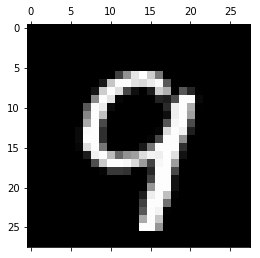

Предсказанное число 7
Соответствующее изображение числа:


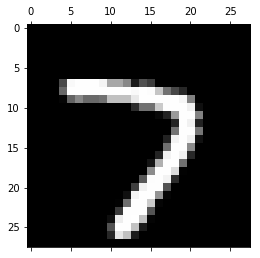

Предсказанное число 3
Соответствующее изображение числа:


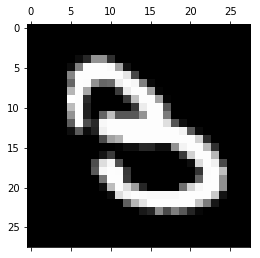

Предсказанное число 4
Соответствующее изображение числа:


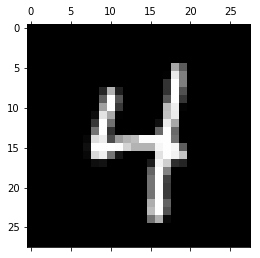

Предсказанное число 9
Соответствующее изображение числа:


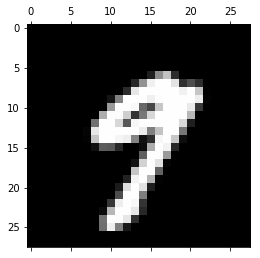

Предсказанное число 6
Соответствующее изображение числа:


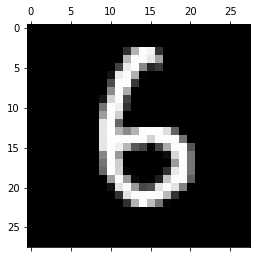

Предсказанное число 6
Соответствующее изображение числа:


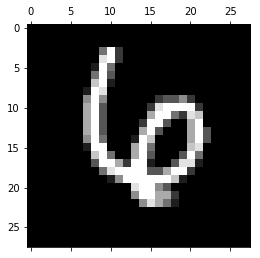

Предсказанное число 5
Соответствующее изображение числа:


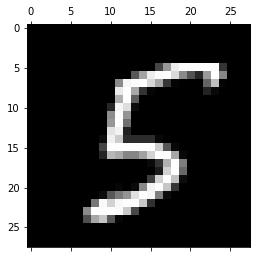

Предсказанное число 4
Соответствующее изображение числа:


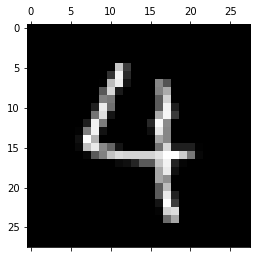

Предсказанное число 0
Соответствующее изображение числа:


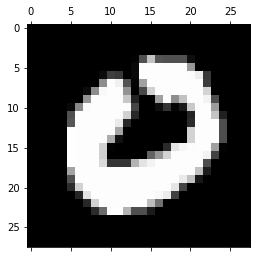

Предсказанное число 7
Соответствующее изображение числа:


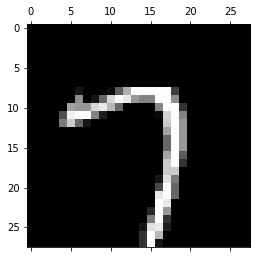

Предсказанное число 4
Соответствующее изображение числа:


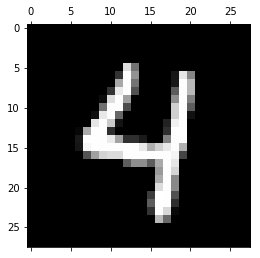

Предсказанное число 0
Соответствующее изображение числа:


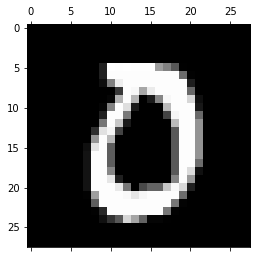

Предсказанное число 1
Соответствующее изображение числа:


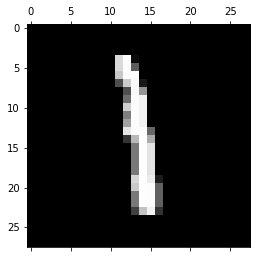

Предсказанное число 3
Соответствующее изображение числа:


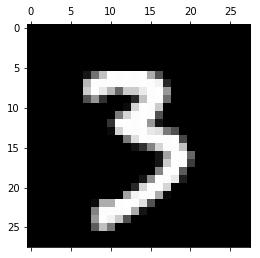

Предсказанное число 1
Соответствующее изображение числа:


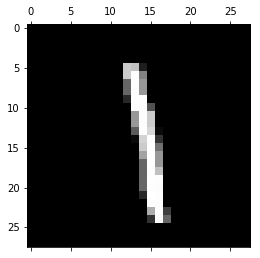

Предсказанное число 3
Соответствующее изображение числа:


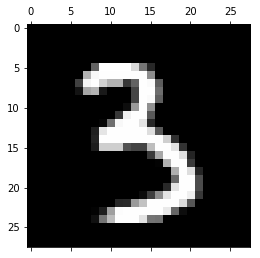

Предсказанное число 4
Соответствующее изображение числа:


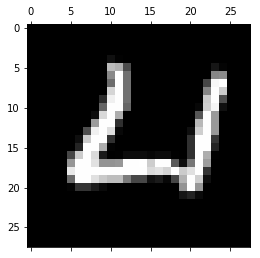

Предсказанное число 7
Соответствующее изображение числа:


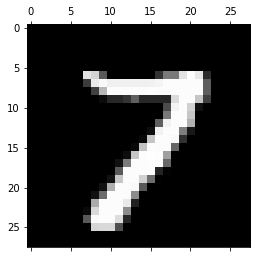

Предсказанное число 2
Соответствующее изображение числа:


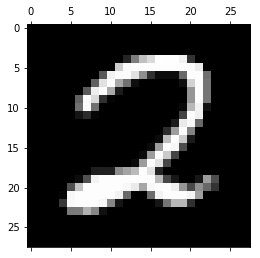

Предсказанное число 7
Соответствующее изображение числа:


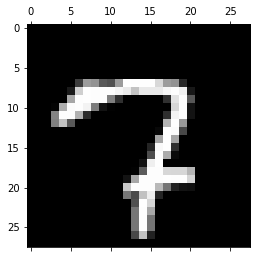

Предсказанное число 1
Соответствующее изображение числа:


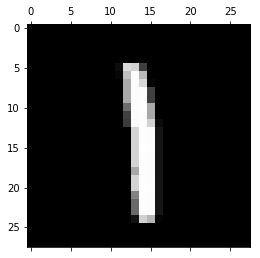

Предсказанное число 2
Соответствующее изображение числа:


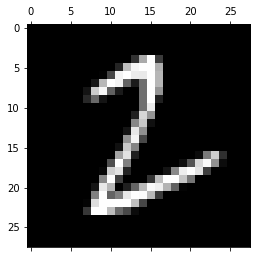

Предсказанное число 1
Соответствующее изображение числа:


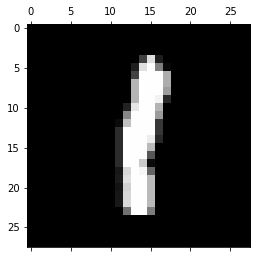

Предсказанное число 1
Соответствующее изображение числа:


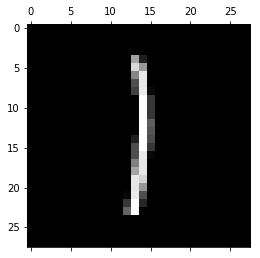

Предсказанное число 7
Соответствующее изображение числа:


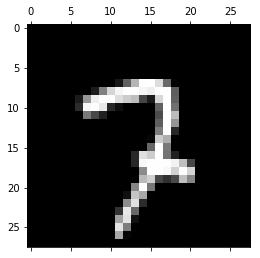

Предсказанное число 4
Соответствующее изображение числа:


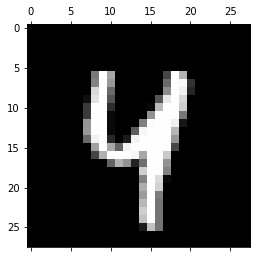

Предсказанное число 2
Соответствующее изображение числа:


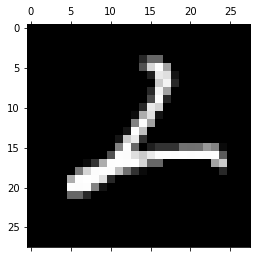

Предсказанное число 3
Соответствующее изображение числа:


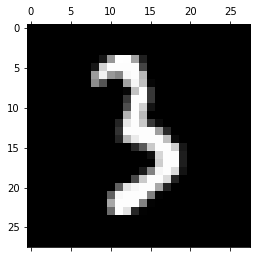

Предсказанное число 5
Соответствующее изображение числа:


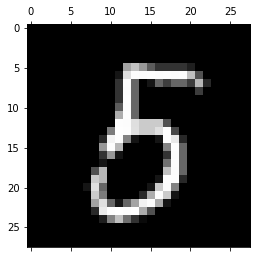

Предсказанное число 1
Соответствующее изображение числа:


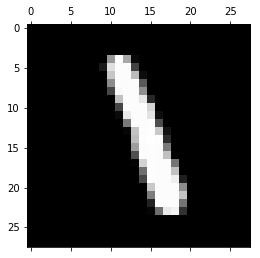

Предсказанное число 2
Соответствующее изображение числа:


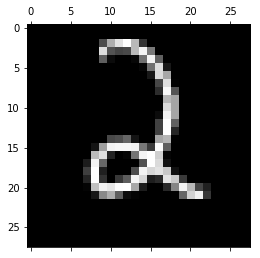

Предсказанное число 4
Соответствующее изображение числа:


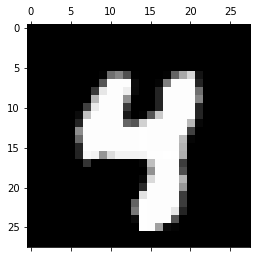

Предсказанное число 4
Соответствующее изображение числа:


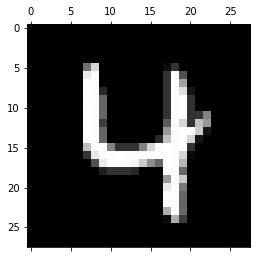

In [44]:
for i in range(50):
    print("Предсказанное число %i"%result[i])
    print("Соответствующее изображение числа:")
    plt.gray()
    plt.matshow(np.reshape(test_images[i],(28,28)))
    plt.show()